# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**
       
### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

In [27]:
#1

import numpy as np

def generate_matrix(a, b, n):
    return np.random.randint(a, b, size=(n,n))
    
print(generate_matrix(1,20,3))



[[13 11  5]
 [ 7 15 12]
 [17  1  4]]


[('to', 56), ('the', 26), ('network', 17), ('networks', 13), ('users', 10), ('a', 10), ('computers', 8), ('going', 7), ('file', 7), ('problems', 7), ('never', 6), ('time', 6), ('you', 6), ('This', 6), ('companies', 6), ('system', 6), ('access', 6), ('files', 6), ('also', 6), ('is', 6)]


<BarContainer object of 20 artists>

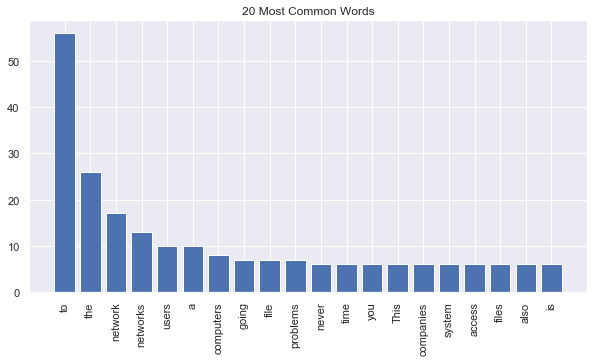

In [3]:
#2

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

networks = open('data/networks.txt', 'r')
stopwords = open('data/stop.txt', 'r')

nw_words = []

sw_words = [line.strip('\n\'\',')for line in stopwords]
    
#print(sw_words)

for line in networks:
    nw_words.extend(line.split())

for word in nw_words:
    if word in sw_words:
        nw_words.remove(word)

#print(nw_words)
        
final = [word.strip('.,') for word in nw_words]
        
#print(final)

wordCount = dict(Counter(final).most_common(20))
print(Counter(final).most_common(20))

sns.set()
plt.subplots(figsize=(10,5)) # Set figure size
plt.title('20 Most Common Words')
plt.xticks(rotation='vertical')
plt.bar(wordCount.keys(), wordCount.values(), color='b')

In [26]:
#3

tl_en = open('data/tl-en.txt', encoding="utf8")
conyo = open('data/ateneo.txt')

tl_en_dict = {}

for line in tl_en:
    ls = line.split()
    tl_en_dict[ls[0]] = ls[1]

#print(tl_en_dict)

for line in conyo:
    ls = line.split()
    new_ls = []
    for i in ls:
        bare = i.lower().strip('".,?')
        if bare in tl_en_dict:
            new_ls.append(tl_en_dict[bare])
        else:
            new_ls.append(i)
    print(" ".join(new_ls))
    


"Manong, to only d'yan sa have side."
"Mej hassle naman this rain."
what bro Katip later? G?"
wait I'm like gonna dinner only with the fambam."
"Which car am I gonna take today so
"Don't make stitch sa fishball first it's not cuisine yet."
brother much po yung neon balls?"
"Pweds ka ba later?"
"Ugh, there's no parking space pa. Eh, I'm late na nga
"It's like super intense really As in extreme
"I'll make goodbye pa. You know naman my dad is strict, eh."
"You're, like so duration ha."
"Make it fast only ha?"
"What's wrong with being conyo ba?"


In [54]:
#4

from bs4 import BeautifulSoup
import requests

# Prepares data from the website
URL = 'https://www.azlyrics.com/lyrics/billieeilish/badguy.html'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

tl_en = open('data/tl-en.txt', encoding="utf8")
tl_en_dict = {}

# Creates a English-Tagalog dictionary from text
for line in tl_en:
    ls = line.split()
    tl_en_dict[ls[1]] = ls[0]
    
# Parses webpage and collects necessary data
lyrics = []
for div in soup.findAll('div', attrs = {'class': None}):
    lyrics.extend(div.text.lower().strip(',!?-.\'\'').split('\n'))

lyrics = [line.split() for line in lyrics]

# Translates parsed text based on the dictionary
translated_lyrics = []
for line in lyrics:
    new_line = []
    for word in line:
        if word.strip() in tl_en_dict:
            new_line.append(tl_en_dict[word])
        else:
            new_line.append(word)
    translated_lyrics.append(new_line)

#print(lyrics)
#print(translated_lyrics)
final = [' '.join(line) for line in translated_lyrics]

for line in final:
    print(line)



maputi shirt ngayon red, aking duguan ilong
sleeping, ikaw noong iyong tippy toes
gumagapang paligid gustuhin wala one knows
isipin ikaw kaya kriminal

pasa noong pareho aking tuhod para ikaw
don't say pasalamatan ikaw o please, ako gawa
anung ako gustong kailan i'm kulang kay
aking soul? kaya cynical

kaya ikaw a matigas guy
like-it-really-rough guy
just-can't-get-enough guy
chest-always-so-puffed guy
i'm yan bad type
make-your-mama-sad type
make-your-girlfriend-mad type
might-seduce-your-dad type
i'm yung bad guy, duh

i'm yung bad guy

ako gustuhin it kailan ikaw kumuha kontrolin
kahit kung ikaw alam yan ikaw don't
sariling me, i'll let ikaw makipaglaro yung tungkulin
i'll magiging iyong animal

aking mommy likes kay kumanta along
kay me pero she won't kumanta nito kanta
kung she nagbabasa puro yung lyrics
she'll naawa yung kalalakihan ako alam

kaya ikaw a matigas guy
like-it-really-rough guy
just-can't-get-enough guy
chest-always-so-puffed guy
i'm yan bad type
make-your-mama-sad

In [55]:
# Bonus (Tagalog to English)

from bs4 import BeautifulSoup
import requests

# Prepares data from the website
URL = 'https://www.azlyrics.com/lyrics/parokyaniedgar/harana.html'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

tl_en = open('data/tl-en.txt', encoding="utf8")
tl_en_dict = {}

# Creates a English-Tagalog dictionary from text
for line in tl_en:
    ls = line.split()
    tl_en_dict[ls[0]] = ls[1]

# Parses webpage and collects necessary data
lyrics = []
for div in soup.findAll('div', attrs = {'class': None}):
    lyrics.extend(div.text.lower().strip(',!?-.\'\'').split('\n'))

lyrics = [line.split() for line in lyrics]

# Translates parsed text based on the dictionary
translated_lyrics = []
for line in lyrics:
    new_line = []
    for word in line:
        if word.strip() in tl_en_dict:
            new_line.append(tl_en_dict[word])
        else:
            new_line.append(word)
    translated_lyrics.append(new_line)

#print(lyrics)
#print(translated_lyrics)
final = [' '.join(line) for line in translated_lyrics]

for line in final:
    print(line)



trends pa ba ang serenade
possibly you're ay wonder
who ba 'tong looks gago
nagkandarapa sa singing
at nasisintunado sa kaba
fitted more carrying the roses
wearing nama'y denim na faded
at nariyan pa ang barkada
naka-porma naka-barong
sa gregorian defeats pa ang minus one
at sing-along

trees ang heaven ng star
at with cold pa ng air
sa 'yong think ako'y crazy graces
at sa song kong this
sana'y maibigan mo
ibubuhos ko ang whole heartless ko
sa isang munting serenade
for sa'yo

di ba like isang sine
isang pelikulang romantic
di ba't you're ang bidang actress
at i ang 'yong leading man
sa istoryang huddle
sa pag-ibig na sincerely

trees ang heaven ng star
at with cold pa ng air
sa 'yong think ako'y crazy graces
at sa song kong this
sana'y maibigan mo
ibubuhos ko ang whole heartless ko
sa isang munting serenade
for sa 'yo

